### Importing dependencies

In [89]:
%matplotlib inline

In [90]:


import matplotlib.pyplot as plt
from matplotlib import cm
import pandas as pd
import scipy.stats as st
from sklearn import datasets
import numpy as np
from scipy.stats import linregress

from sklearn.linear_model import LinearRegression

import seaborn as sns

In [91]:
# Study data files
world_suicide_data_path = "Suicide_Data_sn/master_sn.csv"
continents_list_data_path = "Suicide_Data_sn/continents_sn.csv"

# Read the data and the study results
world_suicide_data = pd.read_csv(world_suicide_data_path)
continents_list_data = pd.read_csv(continents_list_data_path)


In [92]:
world_suicide_data.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [93]:
continents_list_data.head()

,country,Continent
0,Algeria,Africa
1,Angola,Africa
2,Aruba,South America
3,Benin,Africa
4,United States,North America


In [94]:
merged_suicide_df = world_suicide_data.merge(continents_list_data,on='country')
merged_suicide_df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation,Continent
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X,Europe
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent,Europe
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X,Europe
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation,Europe
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers,Europe


In [95]:
merged_suicide_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27448 entries, 0 to 27447
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27448 non-null  object 
 1   year                27448 non-null  int64  
 2   sex                 27448 non-null  object 
 3   age                 27448 non-null  object 
 4   suicides_no         27448 non-null  int64  
 5   population          27448 non-null  int64  
 6   suicides/100k pop   27448 non-null  float64
 7   country-year        27448 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27448 non-null  object 
 10  gdp_per_capita ($)  27448 non-null  int64  
 11  generation          27448 non-null  object 
 12  Continent           27448 non-null  object 
dtypes: float64(2), int64(4), object(7)
memory usage: 2.9+ MB


In [96]:
merged_suicide_df.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27448.000000,27448.000000,2.744800e+04,27448.000000,8364.000000,27448.000000
mean,2001.275430,236.326508,1.820432e+06,12.649132,0.776601,16894.453949
std,8.461146,901.319423,3.925923e+06,18.634408,0.093367,18992.033013
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,2.000000,9.568750e+04,0.900000,0.713000,3418.000000
50%,2002.000000,24.000000,4.182000e+05,5.890000,0.779000,9184.000000
75%,2008.000000,124.000000,1.423055e+06,16.402500,0.855000,24964.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


In [97]:
merged_suicide_df.isnull().sum()

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19084
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
Continent                 0
dtype: int64

In [98]:
merged_suicide_df.drop(['HDI for year'],axis=1,inplace=True)

In [99]:
merged_suicide_df.groupby(['country']).count()


,year,sex,age,suicides_no,population,suicides/100k pop,country-year,gdp_for_year ($),gdp_per_capita ($),generation,Continent
country,,,,,,,,,,,
Albania,264,264,264,264,264,264,264,264,264,264,264
Antigua and Barbuda,324,324,324,324,324,324,324,324,324,324,324
Argentina,372,372,372,372,372,372,372,372,372,372,372
Armenia,298,298,298,298,298,298,298,298,298,298,298
Aruba,168,168,168,168,168,168,168,168,168,168,168
...,...,...,...,...,...,...,...,...,...,...,...
United Arab Emirates,72,72,72,72,72,72,72,72,72,72,72
United Kingdom,372,372,372,372,372,372,372,372,372,372,372
United States,372,372,372,372,372,372,372,372,372,372,372


In [100]:
# Group by country and count corresponding values to get common countries

merged_df_groupby_country = merged_suicide_df.groupby(['country']).count().reset_index()

common_countries_list = merged_df_groupby_country[merged_df_groupby_country['year'] == 372]['country'].unique().tolist()


In [101]:
common_countries_list

['Argentina',
 'Belgium',
 'Brazil',
 'Chile',
 'Colombia',
 'Ecuador',
 'Greece',
 'Israel',
 'Italy',
 'Japan',
 'Luxembourg',
 'Malta',
 'Mexico',
 'Puerto Rico',
 'Singapore',
 'Spain',
 'United Kingdom',
 'United States']

In [102]:
len(common_countries_list)

18

In [103]:
merged_suicide_df_finalqc = merged_suicide_df[merged_suicide_df["year"]<2016]

In [104]:
merged_suicide_df_finalqc = merged_suicide_df_finalqc[merged_suicide_df_finalqc["country"].isin(common_countries_list)].reset_index()

In [105]:
merged_suicide_df_finalqc.head()

,index,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,gdp_for_year ($),gdp_per_capita ($),generation,Continent
0,588,Argentina,1985,male,75+ years,202,363000,55.65,Argentina1985,"88,416,668,900",3264,G.I. Generation,South America
1,589,Argentina,1985,male,55-74 years,485,1997000,24.29,Argentina1985,"88,416,668,900",3264,G.I. Generation,South America
2,590,Argentina,1985,male,35-54 years,414,3346300,12.37,Argentina1985,"88,416,668,900",3264,Silent,South America
3,591,Argentina,1985,female,55-74 years,210,2304000,9.11,Argentina1985,"88,416,668,900",3264,G.I. Generation,South America
4,592,Argentina,1985,male,25-34 years,177,2234200,7.92,Argentina1985,"88,416,668,900",3264,Boomers,South America


In [106]:
sub_suicide_rate_df = merged_suicide_df_finalqc.groupby(['year']).sum()[['suicides_no','population']].reset_index()

In [107]:
sub_suicide_rate_df.head()

,year,suicides_no,population
0,1985,78488,760559235
1,1986,82480,768403833
2,1987,80620,778419467
3,1988,79434,788164475
4,1989,76956,797408585


In [108]:
sub_suicide_rate_df['Suicide_Rate'] = sub_suicide_rate_df['suicides_no']/sub_suicide_rate_df['population']*100000

In [109]:
sub_suicide_rate_df.head()

,year,suicides_no,population,Suicide_Rate
0,1985,78488,760559235,10.319775
1,1986,82480,768403833,10.733939
2,1987,80620,778419467,10.356884
3,1988,79434,788164475,10.078353
4,1989,76956,797408585,9.650761


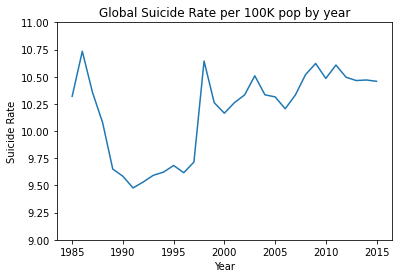

In [110]:
x_axis = sub_suicide_rate_df['year']
y_axis = sub_suicide_rate_df['Suicide_Rate']


plt.plot(x_axis , y_axis)

plt.ylim((9,11))

plt.xlabel('Year')
plt.ylabel('Suicide Rate')
plt.title('Global Suicide Rate per 100K pop by year')
plt.savefig("Images_sn/Global Suicide Rate by Year.png")

plt.show()

# Suicide No: Male


(50000.0, 90000.0)

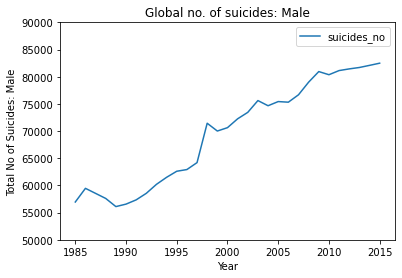

In [111]:
sub_suicide_no_gender_df = merged_suicide_df_finalqc.groupby(["year","sex"]).sum()["suicides_no"].reset_index()

sub_suicide_no_gender_df= sub_suicide_no_gender_df.set_index("year")

sub_suicide_no_gender_df[sub_suicide_no_gender_df['sex'] == 'male'].plot()

plt.xlabel('Year')
plt.ylabel('Total No of Suicides: Male')

plt.title("Global no. of suicides: Male")
plt.savefig("Images_sn/Global Suicide Rate by Gender-Male.png")


plt.ylim((50000,90000))



# Suicide No: Female

(10000.0, 50000.0)

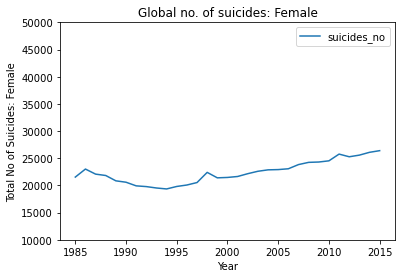

In [112]:
sub_suicide_no_gender_df[sub_suicide_no_gender_df['sex'] == 'female'].plot()
plt.xlabel('Year')
plt.ylabel('Total No of Suicides: Female')
plt.title("Global no. of suicides: Female")

plt.savefig("Images_sn/Global Suicide Rate by Gender-Female.png")


plt.ylim((10000,50000))


# Suicide No/100k pop: Male

(1000.0, 2000.0)

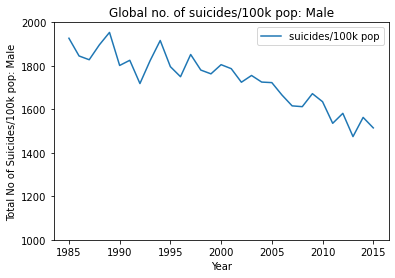

In [113]:
sub_suicide_per100k_gender_df = merged_suicide_df_finalqc.groupby(["year","sex"]).sum()["suicides/100k pop"].reset_index()

sub_suicide_per100k_gender_df= sub_suicide_per100k_gender_df.set_index("year")

sub_suicide_per100k_gender_df[sub_suicide_per100k_gender_df['sex'] == 'male'].plot()

plt.xlabel('Year')
plt.ylabel('Total No of Suicides/100k pop: Male')

plt.title("Global no. of suicides/100k pop: Male")

plt.savefig("Images_sn/Global Suicide Rate per 100k by Gender-Male.png")


plt.ylim((1000,2000))


# Suicide No/100k pop: Female

(100.0, 1000.0)

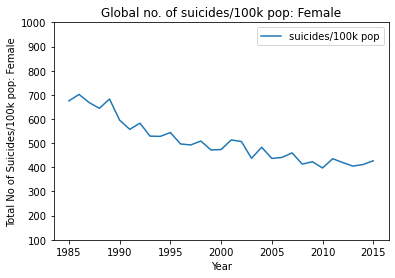

In [114]:
sub_suicide_per100k_gender_df[sub_suicide_per100k_gender_df['sex'] == 'female'].plot()

plt.xlabel('Year')
plt.ylabel('Total No of Suicides/100k pop: Female')

plt.title("Global no. of suicides/100k pop: Female")

plt.savefig("Images_sn/Global Suicide Rate per 100k by Gender-Female.png")


plt.ylim((100,1000))

# Population over time

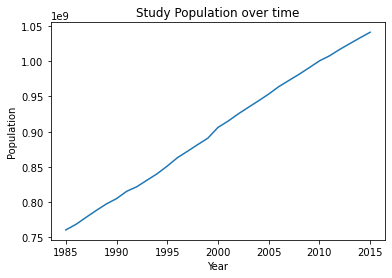

In [115]:
sub_suicide_no_gender_df = merged_suicide_df_finalqc.groupby(["year"]).sum()["population"].reset_index()

sub_suicide_no_gender_df= sub_suicide_no_gender_df.set_index("year")

sub_suicide_no_gender_df['population'].plot()
# sub_suicide_no_gender_df['suicides_no'].plot()
plt.xlabel('Year')
plt.ylabel('Population')

plt.title("Study Population over time")

plt.savefig("Images_sn/Population over time.png")


# plt.ylim((50000,90000))

# Suicide no. over time

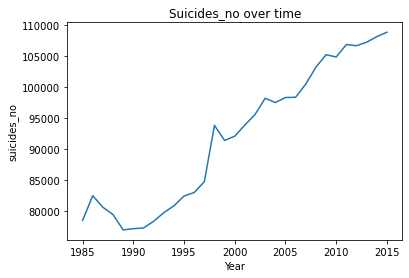

In [116]:
sub_suicide_no_gender_df = merged_suicide_df_finalqc.groupby(["year"]).sum()["suicides_no"].reset_index()

sub_suicide_no_gender_df= sub_suicide_no_gender_df.set_index("year")

sub_suicide_no_gender_df['suicides_no'].plot()
# sub_suicide_no_gender_df['suicides_no'].plot()
plt.xlabel('Year')
plt.ylabel('suicides_no')

plt.title("Suicides_no over time")

plt.savefig("Images_sn/Number of suicides over time.png")


# plt.ylim((50000,90000))

# Suicide number has only gone by by 35,000 from 1985 to 2016; however population has gone up by 300 million

In [117]:
                                                                                          
sub_suicide_rate_continent = merged_suicide_df_finalqc.groupby(['Continent','year']).sum()[["suicides_no","population"]].reset_index()

In [118]:
sub_suicide_rate_continent['Suicide_Rate_Continent'] = sub_suicide_rate_continent['suicides_no']/sub_suicide_rate_continent['population']*100000

In [119]:
sub_suicide_rate_continent['Continent'].unique()

array(['Asia', 'Europe', 'North America', 'South America'], dtype=object)

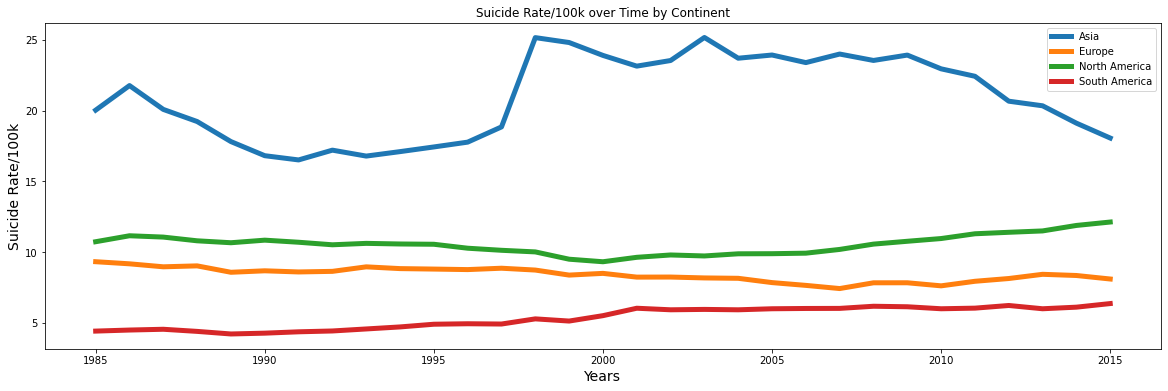

In [120]:
plt.figure(figsize=(20,6))
for continent in ('Asia', 'Europe', 'North America', 'South America'):
    
    file_c = sub_suicide_rate_continent[sub_suicide_rate_continent['Continent'] == continent].set_index("year")["Suicide_Rate_Continent"].reset_index().set_index("year")
    
    x=file_c.index.tolist()
    y=file_c["Suicide_Rate_Continent"]
    plt.plot(x,y, linewidth=5, label=continent)
    #plt.yticks(np.arange(0,65000, step=10000), fontsize=12)
    #plt.xticks(np.arange(1985,2016, step=1), fontsize=12)
    plt.xlabel("Years",fontsize=14)
    plt.ylabel("Suicide Rate/100k", fontsize=14)
    
    plt.title("Suicide Rate/100k over Time by Continent")
    
    plt.savefig("Images_sn/Suicide Rate_per_100k over Time by Continent.png")

    
plt.legend()
plt.show()

In [121]:
sub_total_country = merged_suicide_df_finalqc.groupby(["year","country"]).sum()[["suicides_no","population"]].reset_index()

In [122]:
sub_total_gdp =merged_suicide_df_finalqc[["country","year","gdp_per_capita ($)"]].drop_duplicates()

In [123]:
sub_total_gdp_country = pd.merge(sub_total_country,sub_total_gdp, on =["country","year"], how = "left")

In [124]:
sub_total_gdp_country["suicide_rate"] = (sub_total_gdp_country["suicides_no"]/sub_total_gdp_country["population"])*100000

In [125]:
sub_total_gdp_country['gdp'] = (sub_total_gdp_country["gdp_per_capita ($)"]*sub_total_gdp_country["population"])/1000000000

In [126]:
sub_total_gdp_country.head()

,year,country,suicides_no,population,gdp_per_capita ($),suicide_rate,gdp
0,1985,Argentina,1988,27090800,3264,7.338285,88.424371
1,1985,Belgium,2281,9269600,9356,24.607319,86.726378
2,1985,Brazil,4228,117478900,1898,3.598944,222.974952
3,1985,Chile,683,10675400,1658,6.397887,17.699813
4,1985,Colombia,1001,25052400,1393,3.995625,34.897993


In [127]:
###let us see "Argentina"
def scatter_plot(country):
  p = sub_total_gdp_country[sub_total_gdp_country["country"]==country]
  x =p["suicides_no"]
  y = p["gdp"]
  plt.scatter(x,y)
  plt.title("suicide_rate vs gdp")
  plt.xlabel("suicide_rate",fontsize=14)
  plt.ylabel("gdp",fontsize=14)


The correlation between both factors is 0.31


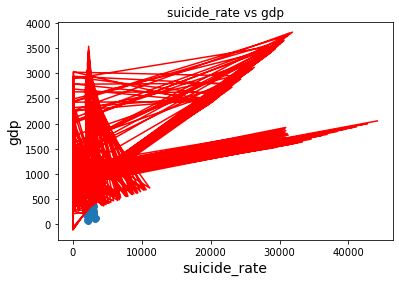

In [128]:
###let us see "Argentina"
def scatter_plot(country):
  p = sub_total_gdp_country[sub_total_gdp_country["country"]==country]
  x =p["suicides_no"]
  y = p["gdp"]
  plt.scatter(x,y)
  plt.title("suicide_rate vs gdp")
  plt.xlabel("suicide_rate",fontsize=14)
  plt.ylabel("gdp",fontsize=14)

suicide_rate = sub_total_gdp_country.iloc[:,5]
gdp = sub_total_gdp_country.iloc[:,6]
correlation = st.pearsonr(suicide_rate,gdp)
print(f"The correlation between both factors is {round(correlation[0],2)}")


(slope, intercept, rvalue, pvalue, stderr) = linregress(sub_total_gdp_country['suicide_rate'], sub_total_gdp_country['gdp'])
regress_values = sub_total_gdp_country['suicide_rate'] * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(sub_total_gdp_country['suicides_no'],regress_values,"r-", label=line_eq)


scatter_plot("Argentina")
# plt.show()

In [129]:
###let us see "Argentina"
def scatter_plot__suicide_v_gdp(country):
  p = sub_total_gdp_country[sub_total_gdp_country["country"]==country]
  x =p["gdp"]
  y = p["suicides_no"]
  plt.scatter(x,y)
    
  plt.title("suicide_rate vs gdp")

  plt.xlabel("gdp",fontsize=14)
  plt.ylabel("suicide_rate",fontsize=14)

  plt.savefig("Images_sn/SuicideRateversusGDP.png")




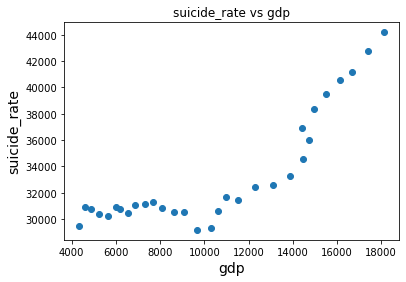

In [130]:
scatter_plot__suicide_v_gdp("United States")

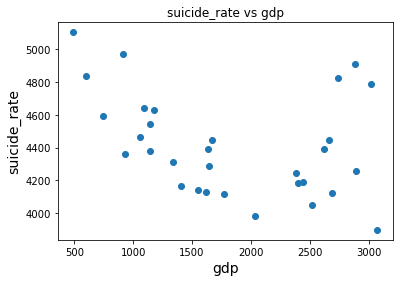

In [131]:
scatter_plot__suicide_v_gdp("United Kingdom")

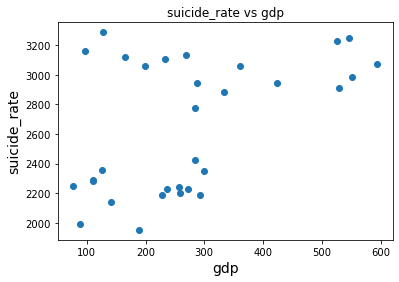

In [132]:
scatter_plot__suicide_v_gdp("Argentina")

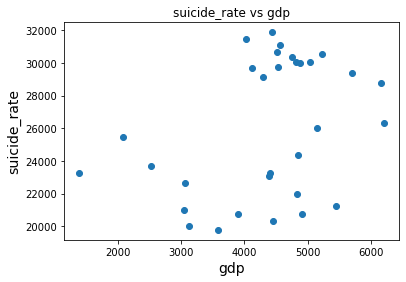

In [133]:
scatter_plot__suicide_v_gdp("Japan")

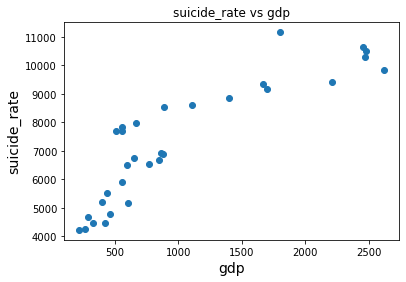

In [134]:
scatter_plot__suicide_v_gdp("Brazil")

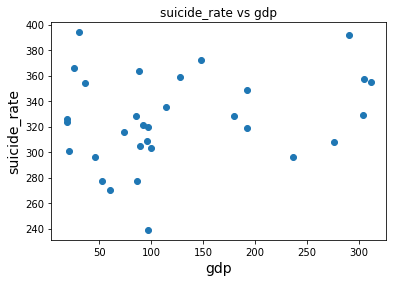

In [135]:
scatter_plot__suicide_v_gdp("Singapore")

# Top 5 Countries by Year

In [136]:
####top 5 countris with higherst suicide rate in different year
total_country = merged_suicide_df.groupby(['country','year']).sum()[["suicides_no","population"]].reset_index()

In [137]:
total_country["suicide_rate"] = (total_country['suicides_no']/total_country['population'])*100000

In [138]:
total_country =total_country.drop(["suicides_no","suicides_no"],axis = 1)

In [139]:
def top_5countries_suicide_by_year(year):
  p =total_country[total_country['year'] == year][['suicide_rate','year','country']].reset_index().set_index('country')['suicide_rate']
  q= p.reset_index().set_index('country').sort_values("suicide_rate", ascending = False)
  q[:5].plot(kind='bar')

  plt.xlabel("Country",fontsize=14)
  plt.ylabel("suicide_rate",fontsize=14)

  plt.title("Top 5 Suicide Rate by Country by Year")
    
  plt.savefig("Images_sn/Top 5 Suicide countries by Year.png")


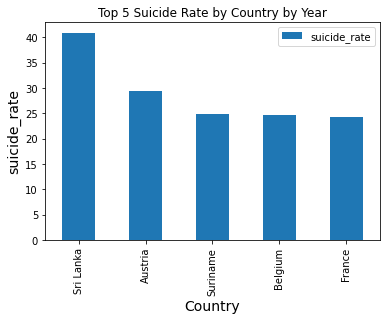

In [140]:
top_5countries_suicide_by_year(1985)

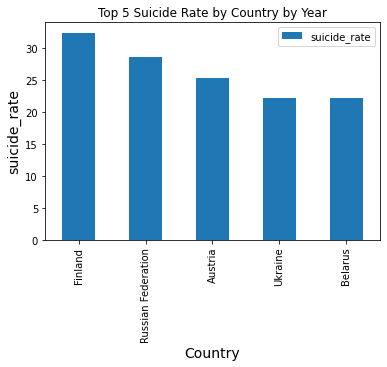

In [141]:
top_5countries_suicide_by_year(1990)

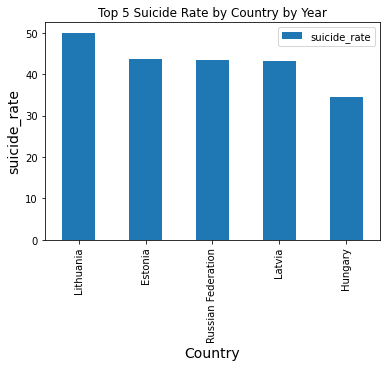

In [142]:
top_5countries_suicide_by_year(1995)

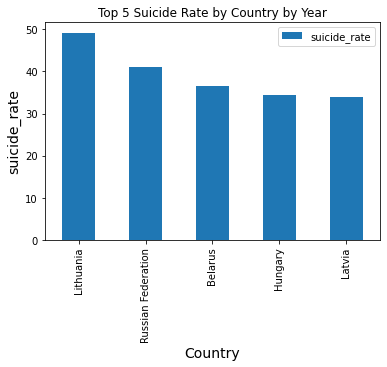

In [143]:
top_5countries_suicide_by_year(2000)

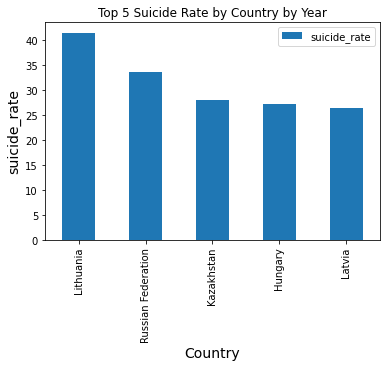

In [144]:
top_5countries_suicide_by_year(2005)

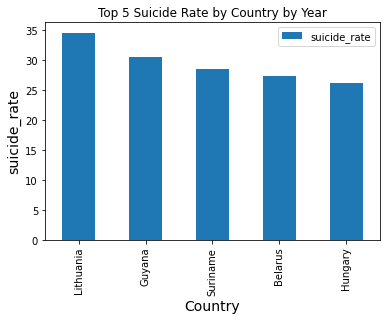

In [145]:
top_5countries_suicide_by_year(2010)

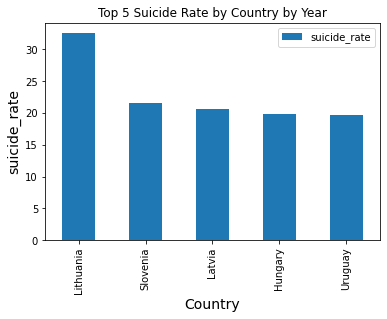

In [146]:
top_5countries_suicide_by_year(2015)

# Top 5 countries by Continent

In [147]:
####top 5 countris with higherst suicide rate in different year in continents

total_country_continent = merged_suicide_df.groupby(['country','Continent','year']).sum()[["suicides_no","population"]].reset_index()

In [148]:
total_country_continent["suicide_rate"] = (total_country_continent['suicides_no']/total_country_continent['population'])*100000

In [149]:
total_country_continent.head()

,country,Continent,year,suicides_no,population,suicide_rate
0,Albania,Europe,1987,73,2709600,2.694125
1,Albania,Europe,1988,63,2764300,2.279058
2,Albania,Europe,1989,68,2803100,2.425886
3,Albania,Europe,1992,47,2822500,1.665190
4,Albania,Europe,1993,73,2807300,2.600363


In [150]:
total_country_continent =total_country_continent.drop(["suicides_no","suicides_no"],axis = 1)

In [151]:
def maxsuicidecountry(year,Continent):
  p =total_country_continent[(total_country_continent['year'] == year) &(total_country_continent['Continent'] == Continent)][['suicide_rate','year','country']].reset_index().set_index('country')['suicide_rate']
  q= p.reset_index().set_index('country').sort_values("suicide_rate", ascending = False)
  q[:5].plot(kind='bar')

  plt.xlabel("Country",fontsize=14)
  plt.ylabel("suicide_rate",fontsize=14)

  plt.title("Top 5 Suicide Rate by Continent by Year")

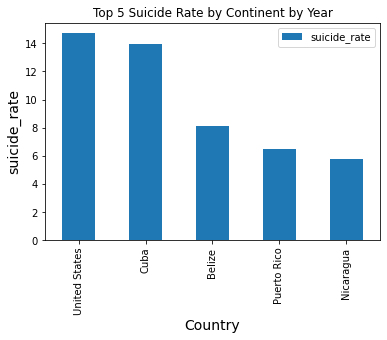

In [152]:
###change the value of yeara
maxsuicidecountry(2015,"North America")

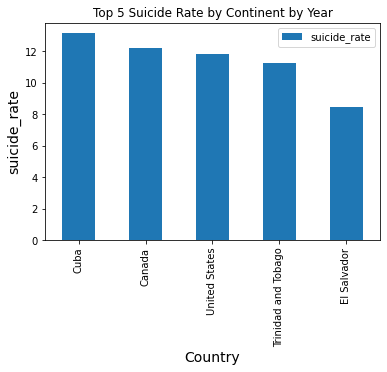

In [153]:
maxsuicidecountry(2005,"North America")

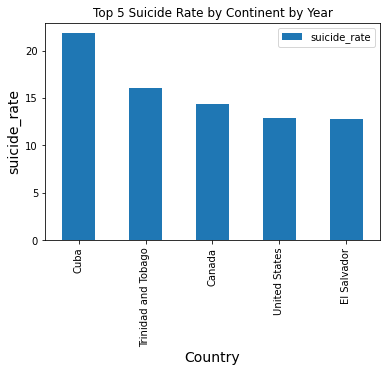

In [154]:
maxsuicidecountry(1995,"North America")

# Age Group Study

In [155]:
sub_total_agegroup = merged_suicide_df_finalqc.groupby(['age','year']).sum()[["suicides_no","population"]].reset_index()

In [156]:
sub_total_agegroup["suicide_rate"] = (sub_total_agegroup['suicides_no']/sub_total_agegroup['population'])*100000

In [157]:
sub_total_agegroup =sub_total_agegroup.drop(["suicides_no","suicides_no"],axis = 1)

In [158]:
age_group = sub_total_agegroup['age'].unique().tolist()

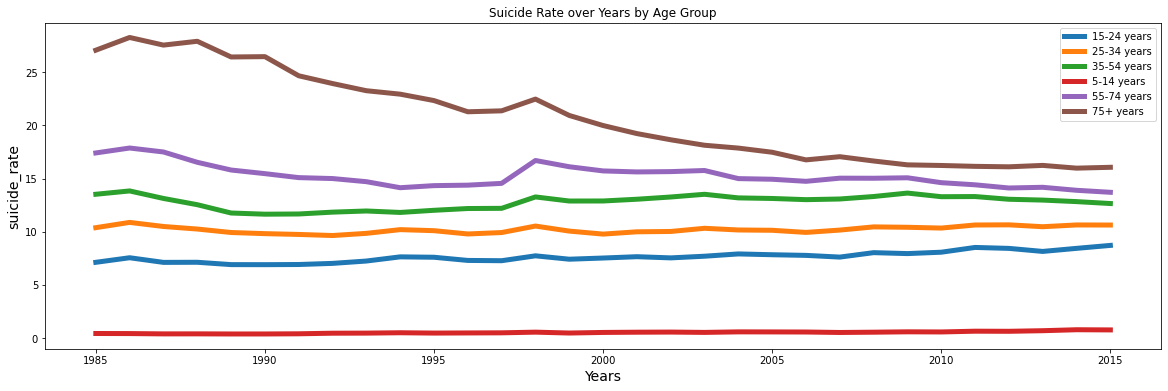

In [159]:
####continent analysis
import numpy as np
plt.figure(figsize=(20,6))
for c in age_group:
    
    file_c=sub_total_agegroup[sub_total_agegroup['age']==c].set_index("year")["suicide_rate"].reset_index().set_index("year")
    
    x=file_c.index.tolist()
    y=file_c["suicide_rate"]
    plt.plot(x,y, linewidth=5, label=c)
    #plt.yticks(np.arange(0,65000, step=10000), fontsize=12)
    #plt.xticks(np.arange(1985,2016, step=1), fontsize=12)
    plt.xlabel("Years",fontsize=14)
    plt.ylabel("suicide_rate", fontsize=14)
    
    plt.title("Suicide Rate over Years by Age Group")
    
    plt.savefig("Images_sn/Suicide Rate by Age Group.png")

    
plt.legend()
plt.show()


# Relation Between Population and Suicide Rate

In [160]:
pop_vs_suicides = merged_suicide_df.groupby("year").sum()[["suicides_no","population"]]

In [161]:
pop_vs_suicides = pop_vs_suicides.drop(2016).reset_index()

In [162]:
pop_vs_suicides.head()

,year,suicides_no,population
0,1985,112374,971883386
1,1986,117212,992369213
2,1987,123541,1056914826
3,1988,118077,1015393924
4,1989,157221,1186342847


In [163]:
pop_vs_suicides['Suicide_Rate'] = pop_vs_suicides['suicides_no']/pop_vs_suicides['population']*100000

In [164]:
pop_vs_suicides.head()

,year,suicides_no,population,Suicide_Rate
0,1985,112374,971883386,11.562498
1,1986,117212,992369213,11.811330
2,1987,123541,1056914826,11.688832
3,1988,118077,1015393924,11.628689
4,1989,157221,1186342847,13.252577


In [165]:
x = pop_vs_suicides['population'].values.reshape(-1,1)
y =pop_vs_suicides['suicides_no'].values.reshape(-1,1)

regressor = LinearRegression()  
model = regressor.fit(x,y)

In [166]:
#To retrieve the intercept:
print(regressor.intercept_)#For retrieving the slope:
print(regressor.coef_)

[16107.19844598]
[[0.00011983]]


In [167]:
y_pred = model.predict(x)

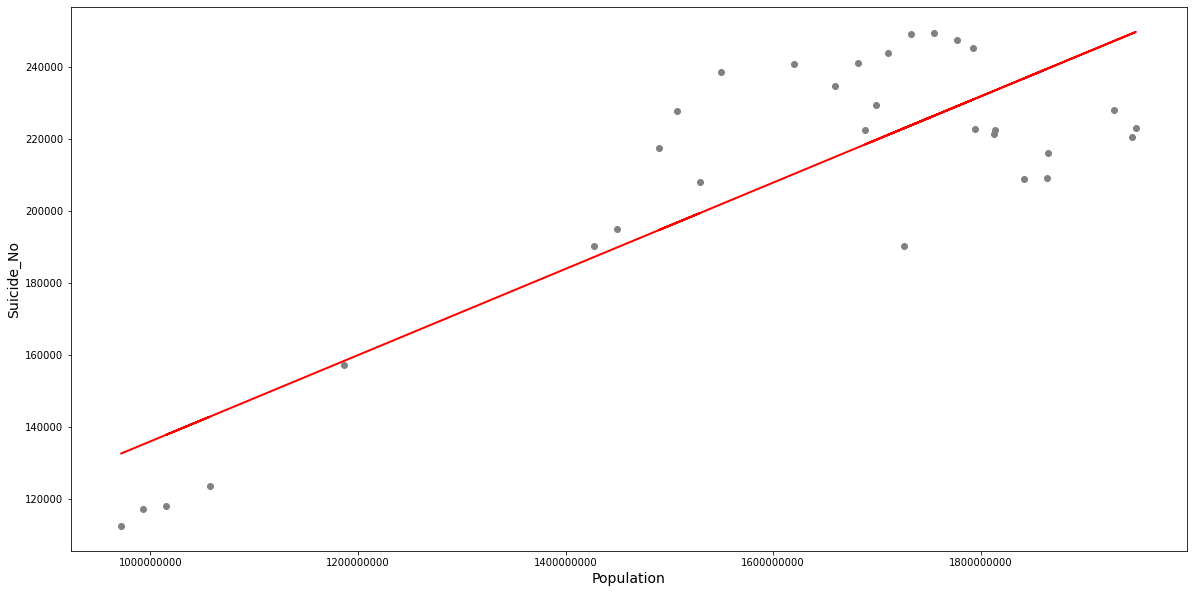

In [168]:
plt.figure(figsize=(20,10))
plt.scatter(x, y,  color='gray')

plt.plot(x, y_pred, color='red', linewidth=2)
ax = plt.gca()
#plt.figure(figsize=(20,20))
ax.get_xaxis().get_major_formatter().set_scientific(False)
ax.get_yaxis().get_major_formatter().set_scientific(False)


plt.xlabel("Population",fontsize=14)
plt.ylabel("Suicide_No",fontsize=14)

plt.savefig("Images_sn/No. of Suicides versus Population.png")

plt.show()

# Repeating analysis with Suicide Rate

[12.97174314]
[[7.99478022e-12]]


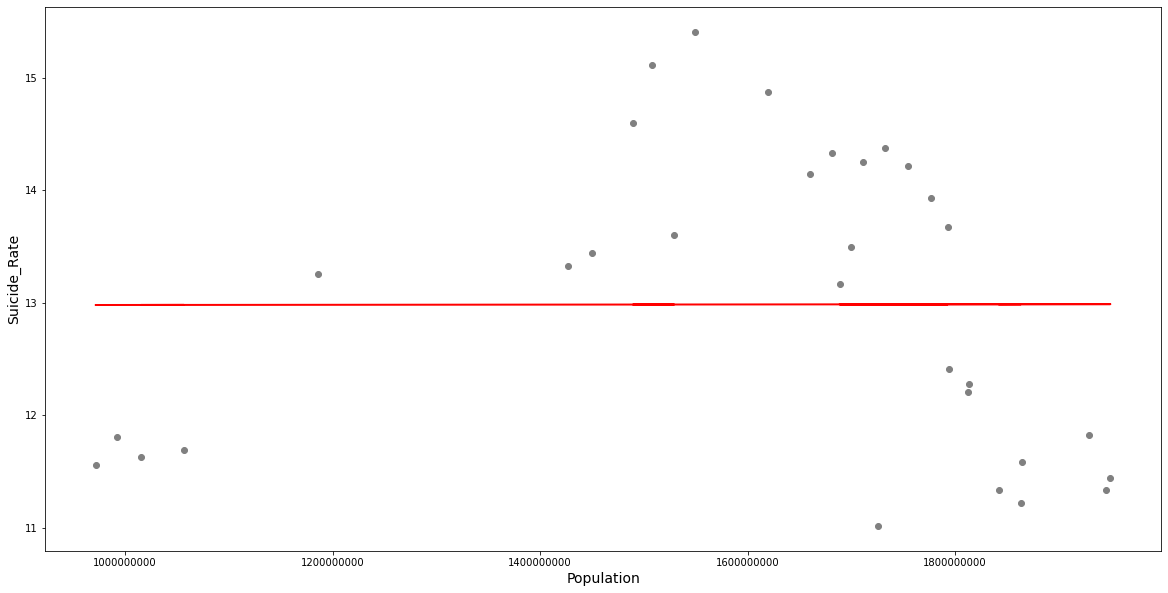

In [169]:
x = pop_vs_suicides['population'].values.reshape(-1,1)
y =pop_vs_suicides['Suicide_Rate'].values.reshape(-1,1)

regressor = LinearRegression()  
model = regressor.fit(x,y)

#To retrieve the intercept:
print(regressor.intercept_)#For retrieving the slope:
print(regressor.coef_)

y_pred = model.predict(x)

plt.figure(figsize=(20,10))
plt.scatter(x, y,  color='gray')

plt.plot(x, y_pred, color='red', linewidth=2)
ax = plt.gca()
#plt.figure(figsize=(20,20))
ax.get_xaxis().get_major_formatter().set_scientific(False)
ax.get_yaxis().get_major_formatter().set_scientific(False)


plt.xlabel("Population",fontsize=14)
plt.ylabel("Suicide_Rate",fontsize=14)

plt.savefig("Images_sn/Suicide Rate versus Population.png")

plt.show()


# Doing regression fit with Rice Class method

In [170]:
population = pop_vs_suicides.iloc[:,2]
Suicide_Rate = pop_vs_suicides.iloc[:,3]
correlation = st.pearsonr(population,Suicide_Rate)
print(f"The correlation between both factors is {round(correlation[0],2)}")


(slope, intercept, rvalue, pvalue, stderr) = linregress(pop_vs_suicides['population'], pop_vs_suicides['Suicide_Rate'])
regress_values = pop_vs_suicides['population'] * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"The equation of the line fitted through the data is: {line_eq}")


The correlation between both factors is 0.0
The equation of the line fitted through the data is: y = 0.0x + 12.97


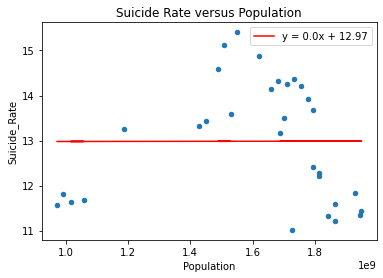

In [171]:
pop_vs_suicides.plot(kind='scatter', x='population', y='Suicide_Rate')
plt.plot(pop_vs_suicides['population'],regress_values,"r-", label=line_eq)
plt.legend()
plt.xlabel('Population')
plt.title('Suicide Rate versus Population')

plt.savefig("Images/Suicide Rate versus Population.png")

plt.show()

# Relation Between GDP and Suicide Rate


## 

In [172]:
pop = merged_suicide_df.groupby("year").sum()[["population"]].reset_index()
x = pop["population"].values.reshape(-1,1)
total_gdp =merged_suicide_df[["year","gdp_per_capita ($)"]].drop_duplicates()

gdp = total_gdp.groupby("year").sum()["gdp_per_capita ($)"].reset_index()

y = gdp["gdp_per_capita ($)"].values.reshape(-1,1)

regressor = LinearRegression()  
model_2 = regressor.fit(x,y)

print(regressor.intercept_)#For retrieving the slope:
print(regressor.coef_)



[-782074.09409725]
[[0.00127528]]


In [173]:
total_gdp.head()

,year,gdp_per_capita ($)
0,1987,796
12,1988,769
24,1989,833
36,1992,251
48,1993,437


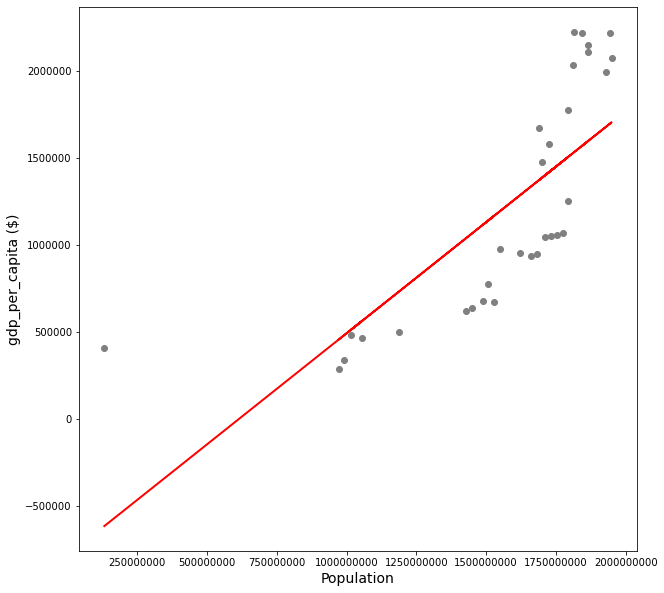

In [174]:
y_pred = model_2.predict(x)

plt.figure(figsize=(10,10))

plt.scatter(x, y,  color='gray')
plt.plot(x, y_pred, color='red', linewidth=2)
ax = plt.gca()


plt.xlabel("Population",fontsize=14)
plt.ylabel("gdp_per_capita ($)",fontsize=14)

plt.savefig("Images_sn/No. of Suicides versus Population.png")

ax.get_xaxis().get_major_formatter().set_scientific(False)
ax.get_yaxis().get_major_formatter().set_scientific(False)



plt.show()

-253777.2820884572
[ 3.13166089e+01  3.13166090e+01  1.22765018e-04  1.58049930e+04
 -2.55666928e-03]


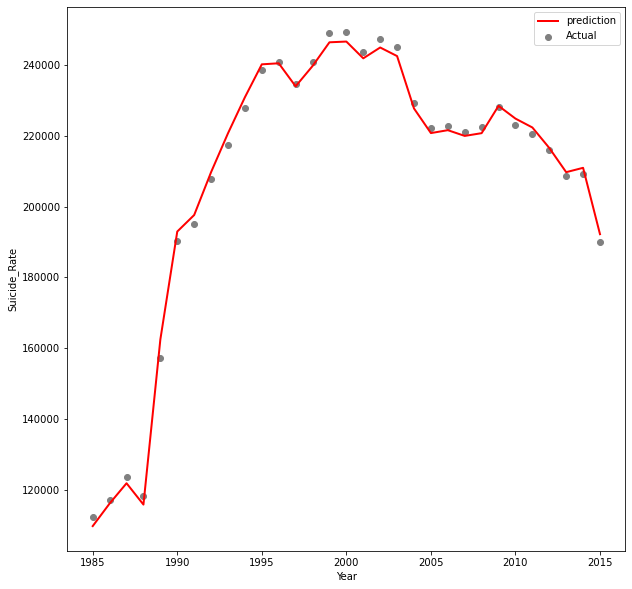

In [175]:
final_data = pd.merge(pop_vs_suicides.reset_index(),gdp,on="year")
final_data = final_data[final_data['year']< 2016]
x= final_data.drop("suicides_no",axis =1)
y = final_data["suicides_no"]
regressor = LinearRegression()  
model_2 = regressor.fit(x,y)
print(regressor.intercept_)#For retrieving the slope:
print(regressor.coef_)
y_pred = model_2.predict(x)
y_pred


plt.figure(figsize=(10,10))
plt.scatter(x['year'], y,  color='gray', label = "Actual")
plt.plot(x['year'], y_pred, color='red', linewidth=2, label ="prediction")
plt.xlabel("Year")
plt.ylabel("Suicide_Rate")
plt.legend()
ax = plt.gca()
ax.get_xaxis().get_major_formatter().set_scientific(False)
ax.get_yaxis().get_major_formatter().set_scientific(False)
# plt.legend(('x', 'line-regression y={}'.format(y)), 'best')

plt.savefig("Prediction of Suicide no- Multivariate Regression.png")


plt.show()

In [176]:
from sklearn.metrics import r2_score

In [177]:
r2_score(y_pred,y)

0.9971112534086458

21.24821313488357
[-4.73199244e-03 -4.73199244e-03  6.06598777e-05 -7.14739838e-09
  8.01306862e-08]


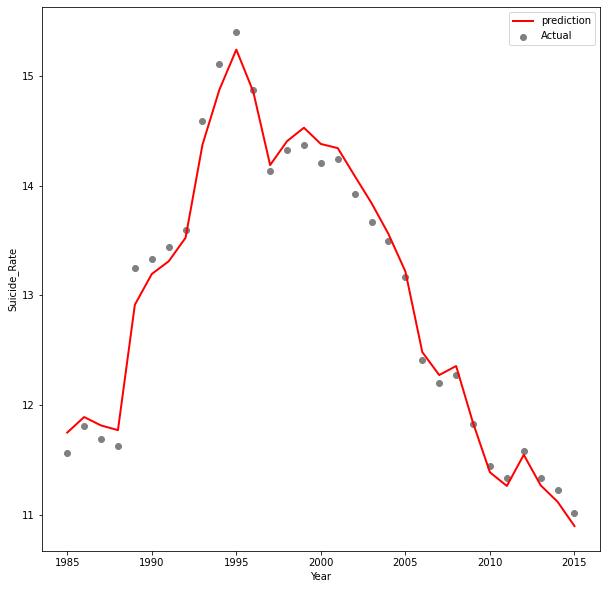

In [178]:
final_data = pd.merge(pop_vs_suicides.reset_index(),gdp,on="year")
final_data = final_data[final_data['year']< 2016]
x= final_data.drop("Suicide_Rate",axis =1)
y = final_data["Suicide_Rate"]
regressor = LinearRegression()  
model_2 = regressor.fit(x,y)
print(regressor.intercept_)#For retrieving the slope:
print(regressor.coef_)
y_pred = model_2.predict(x)
y_pred


plt.figure(figsize=(10,10))
plt.scatter(x['year'], y,  color='gray', label = "Actual")
plt.plot(x['year'], y_pred, color='red', linewidth=2, label ="prediction")
plt.xlabel("Year")
plt.ylabel("Suicide_Rate")
plt.legend()
ax = plt.gca()
ax.get_xaxis().get_major_formatter().set_scientific(False)
ax.get_yaxis().get_major_formatter().set_scientific(False)


plt.savefig("Prediction of Suicide Rate- Multivariate Regression.png")

plt.show()

# Heat map of the dataset shwoing covariance matrix

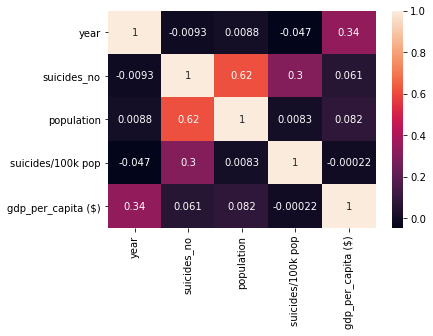

In [179]:
sns.heatmap(merged_suicide_df.corr(),annot=True)



## Multi-variate regression model

In [180]:
United_States = merged_suicide_df[merged_suicide_df["country"]=="United States"].reset_index()
United_States_total=United_States.groupby(["year"]).sum()[['suicides_no','population','gdp_per_capita ($)']].reset_index()

#Rate of Suicides per 100k population

United_States_total['suicides'] = (United_States_total['suicides_no']/United_States_total['population'])*100000

United_States_total = United_States_total.drop(["suicides_no","population"],axis = 1)

y =United_States_total['suicides']
X = United_States_total.drop(['suicides'],axis=1)


In [181]:
United_States_total.head()

,year,gdp_per_capita ($),suicides
0,1985,236316,13.340703
1,1986,247056,13.855835
2,1987,259572,13.672340
3,1988,277236,13.365999
4,1989,295848,13.167630


In [182]:

lr = LinearRegression()  

from sklearn.model_selection import train_test_split

# Independent variables in Xtrain and x test
# dependent variables in ytrain and y test (suicide rate)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

lr.fit(X_train,y_train) ##train model with .fit

y_pred = lr.predict(X_test)  #asking for predictions from model on Xtest.Xtest already has values-independent var.

from sklearn.metrics import mean_squared_error,r2_score

import numpy as np

rmse= np.sqrt(mean_squared_error(y_test,y_pred))
r2score=r2_score(y_test,y_pred)

rmse

1.1425012558630514

In [183]:
r2score

-0.2644596993697266

In [184]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27 entries, 8 to 6
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   year                27 non-null     int64
 1   gdp_per_capita ($)  27 non-null     int64
dtypes: int64(2)
memory usage: 648.0 bytes


In [185]:
X_test

,year,gdp_per_capita ($)
27,2012,662040
15,2000,470616
23,2008,625536
17,2002,490140


In [186]:
y_pred

array([12.98093078, 12.90631269, 12.78493741, 12.99633745])

In [187]:
y_test

27    13.863470
15    11.189108
23    12.760506
17    11.774465
Name: suicides, dtype: float64

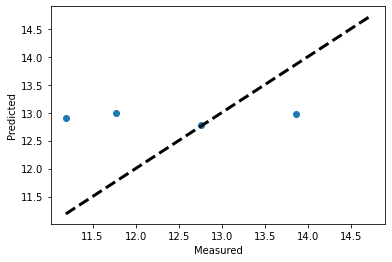

In [188]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=3)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')

plt.savefig("Predicted versus measured-Mulitvariaate regression_Part1.png")

plt.show()

## Method 2: Multivariate regression

In [189]:
from xgboost import XGBRegressor

xgb = XGBRegressor()  
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)
xgb.fit(X_train,y_train)

y_pred1 = xgb.predict(X_test)

from sklearn.metrics import mean_squared_error,r2_score
import numpy as np
rmse2= np.sqrt(mean_squared_error(y_test,y_pred1))
r2score_usa=r2_score(y_test,y_pred1)
rmse2


0.23902120844993768

In [190]:
y_pred1

array([13.057613, 14.72455 , 13.864531, 13.608868], dtype=float32)

In [191]:
r2score_usa

0.8101252572123121

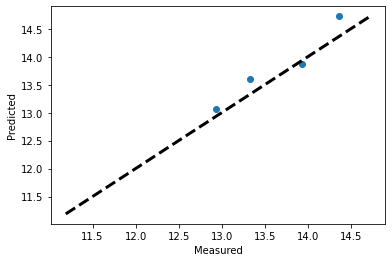

In [192]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred1)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=3)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')

plt.savefig("Predicted versus measured-Mulitvariaate regression_Part2.png")

plt.show()

# Misc to copy into new presentation

In [193]:
qc_data_gen_age = world_suicide_data.groupby(['generation','age'])['sex'].agg(['count'])
qc_data_gen_age.head(30)

count
generation      age               
Boomers         25-34 years   1154
                35-54 years   3030
                55-74 years    806
G.I. Generation 55-74 years    630
                75+ years     2114
Generation X    15-24 years   2114
                25-34 years   2682
                35-54 years    982
                5-14 years     630
Generation Z    5-14 years    1470
Millenials      15-24 years   2528
                25-34 years    806
                5-14 years    2510
Silent          35-54 years    630
                55-74 years   3206
                75+ years     2528

In [194]:
world_suicide_data_usa = world_suicide_data.loc[world_suicide_data['country'] == "United States"]
qc_data_gen_age_v2 = world_suicide_data_usa.groupby(['country','generation','age'])['sex'].agg(['count'])
qc_data_gen_age_v2.head(20)

count
country       generation      age               
United States Boomers         25-34 years     20
                              35-54 years     38
                              55-74 years     10
              G.I. Generation 55-74 years     12
                              75+ years       32
              Generation X    15-24 years     32
                              25-34 years     32
                              35-54 years     12
                              5-14 years      12
              Generation Z    5-14 years      18
              Millenials      15-24 years     30
                              25-34 years     10
                              5-14 years      32
              Silent          35-54 years     12
                              55-74 years     40
                              75+ years       30

In [195]:
suiciderate=merged_suicide_df.groupby(["country"])["suicides_no"].sum()

In [196]:
sort=suiciderate.sort_values(ascending=False)

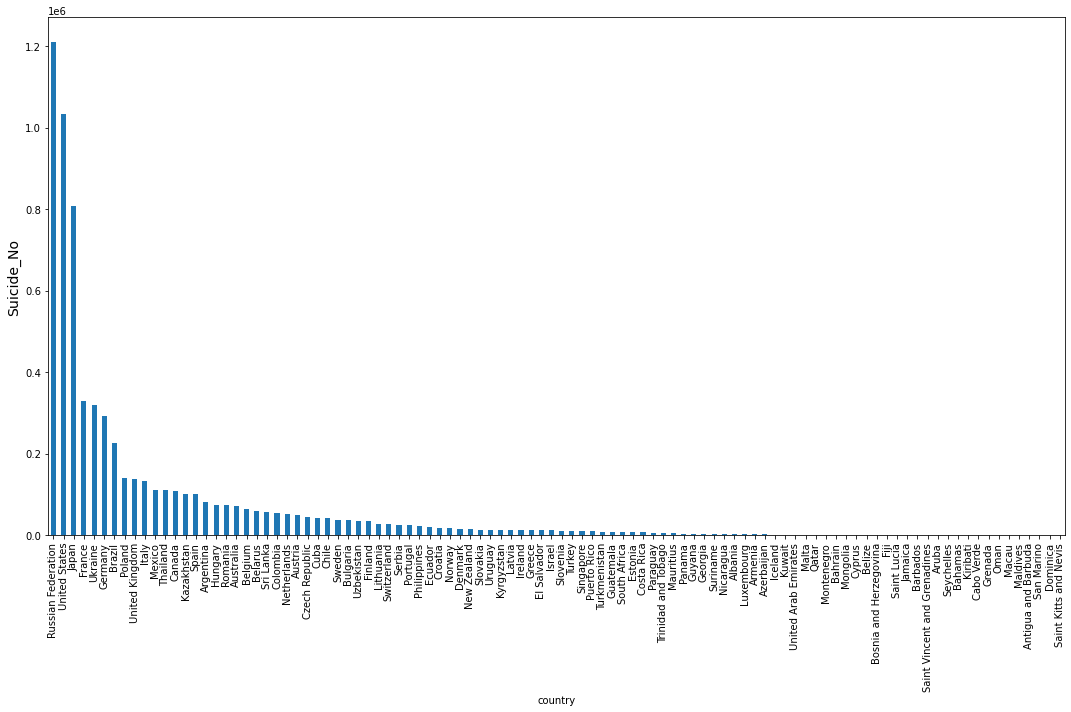

In [197]:
plt.figure(figsize=(15,10))

sort.plot(kind="bar")



plt.ylabel("Suicide_No",fontsize=14)

plt.tight_layout()


In [198]:
# Repeating regression analysis for Italy also
Italy = merged_suicide_df[merged_suicide_df["country"]=="Italy"].reset_index()
Italy_total=Italy.groupby(["year"]).sum()[['suicides_no','population','gdp_per_capita ($)']].reset_index()

#Rate of Suicides per 100k population

Italy_total['suicides'] = (Italy_total['suicides_no']/Italy_total['population'])*100000

Italy_total = Italy_total.drop(["suicides_no","population"],axis = 1)

y1 =Italy_total['suicides']
X1 = Italy_total.drop(['suicides'],axis=1)



In [199]:
from xgboost import XGBRegressor

xgb = XGBRegressor()  
from sklearn.model_selection import train_test_split

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.1, random_state=101)
xgb.fit(X_train1,y_train1)

y_pred2 = xgb.predict(X_test1)

from sklearn.metrics import mean_squared_error,r2_score
import numpy as np
rmse2= np.sqrt(mean_squared_error(y_test1,y_pred2))
r2_score_italy=r2_score(y_test1,y_pred2)
rmse2


0.2585248044181552

In [200]:
r2_score_italy

0.7872135538246307

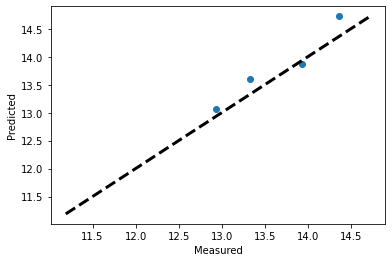

In [201]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred1)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=3)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')

plt.savefig("Predicted versus measured-Mulitvariaate regression_Part2.png")

plt.show()